# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Salma Mayra Utami
- **Email:** M232B4KX4021@bangkit.academy
- **ID Dicoding:** salma_mayra_utami_m232b4kx4021_waQX

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola pembelian dipengaruhi oleh kategori produk dan lokasi geografis?
- Pertanyaan 2 : Bagaimana ulasan konsumen berkaitan dengan produk yang paling banyak dibeli?

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os



In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
# Ekstrak file ZIP
with ZipFile('/content/drive/My Drive/E-commerce-public-dataset.zip', 'r') as zip_ref: # Use ZipFile instead of zipfile.ZipFile
  zip_ref.extractall('/content/temp')

In [29]:
#Baca file CSV yang sudah diekstrak
df_customers = pd.read_csv('/content/temp/E-Commerce Public Dataset/customers_dataset.csv')
df_geolocation = pd.read_csv('/content/temp/E-Commerce Public Dataset/geolocation_dataset.csv')
df_items = pd.read_csv('/content/temp/E-Commerce Public Dataset/order_items_dataset.csv')
df_payments = pd.read_csv('/content/temp/E-Commerce Public Dataset/order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/temp/E-Commerce Public Dataset/order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/temp/E-Commerce Public Dataset/orders_dataset.csv')
df_products = pd.read_csv('/content/temp/E-Commerce Public Dataset/products_dataset.csv')
df_sellers = pd.read_csv('/content/temp/E-Commerce Public Dataset/sellers_dataset.csv')


## Data Wrangling

### Gathering Data

In [30]:
# Gabungkan data items dengan data produk
df_items_products = pd.merge(df_items, df_products, on='product_id')

# Gabungkan data items_products dengan data orders
df_items_orders = pd.merge(df_items_products, df_orders, on='order_id')

# Gabungkan data dengan ulasan
df_items_reviews = pd.merge(df_items_orders, df_reviews, on='order_id', how='left')

# Gabungkan data dengan geolocation (gunakan customer_id)
df_items_customers = pd.merge(df_items_reviews, df_customers, on='customer_id')

# Pastikan data sudah lengkap
df_final = df_items_customers.copy()

# Menampilkan 5 baris pertama dari dataset yang sudah digabungkan
df_final.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


**Insight:**
Data berhasil di-load dan digabungkan menjadi satu DataFrame.

### Assessing Data

In [31]:
# Cek tipe data dan jumlah missing values
df_final.info()

# Cek missing values secara keseluruhan
df_final.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   product_category_name          111702 non-null  object 
 8   product_name_lenght            111702 non-null  float64
 9   product_description_lenght     111702 non-null  float64
 10  product_photos_qty             111702 non-null  float64
 11  product_weight_g               113296 non-null  float64
 12  product_length_cm             

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1612
product_name_lenght,1612
product_description_lenght,1612


**Insight:**
Data diperiksa dari segi tipe dan missing values

### Cleaning Data

In [32]:
# Isi missing values di kolom ulasan dengan nilai 0 (tidak ada ulasan)
df_final['review_score'] = df_final['review_score'].fillna(0)

# Menghapus data yang tidak memiliki informasi lokasi atau kategori produk
df_final = df_final.dropna(subset=['product_category_name', 'customer_city'])

# Pastikan tidak ada missing values
df_final.isnull().sum()



,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0


**Insight:**
Data telah dibersihkan dari missing values.

## Exploratory Data Analysis (EDA)

Berikut adalah Exploratory Data Analysis (EDA) dengan fokus pada Univariate Analysis untuk dataset E-Commerce Public.

**1. Distribusi Kategori Produk**


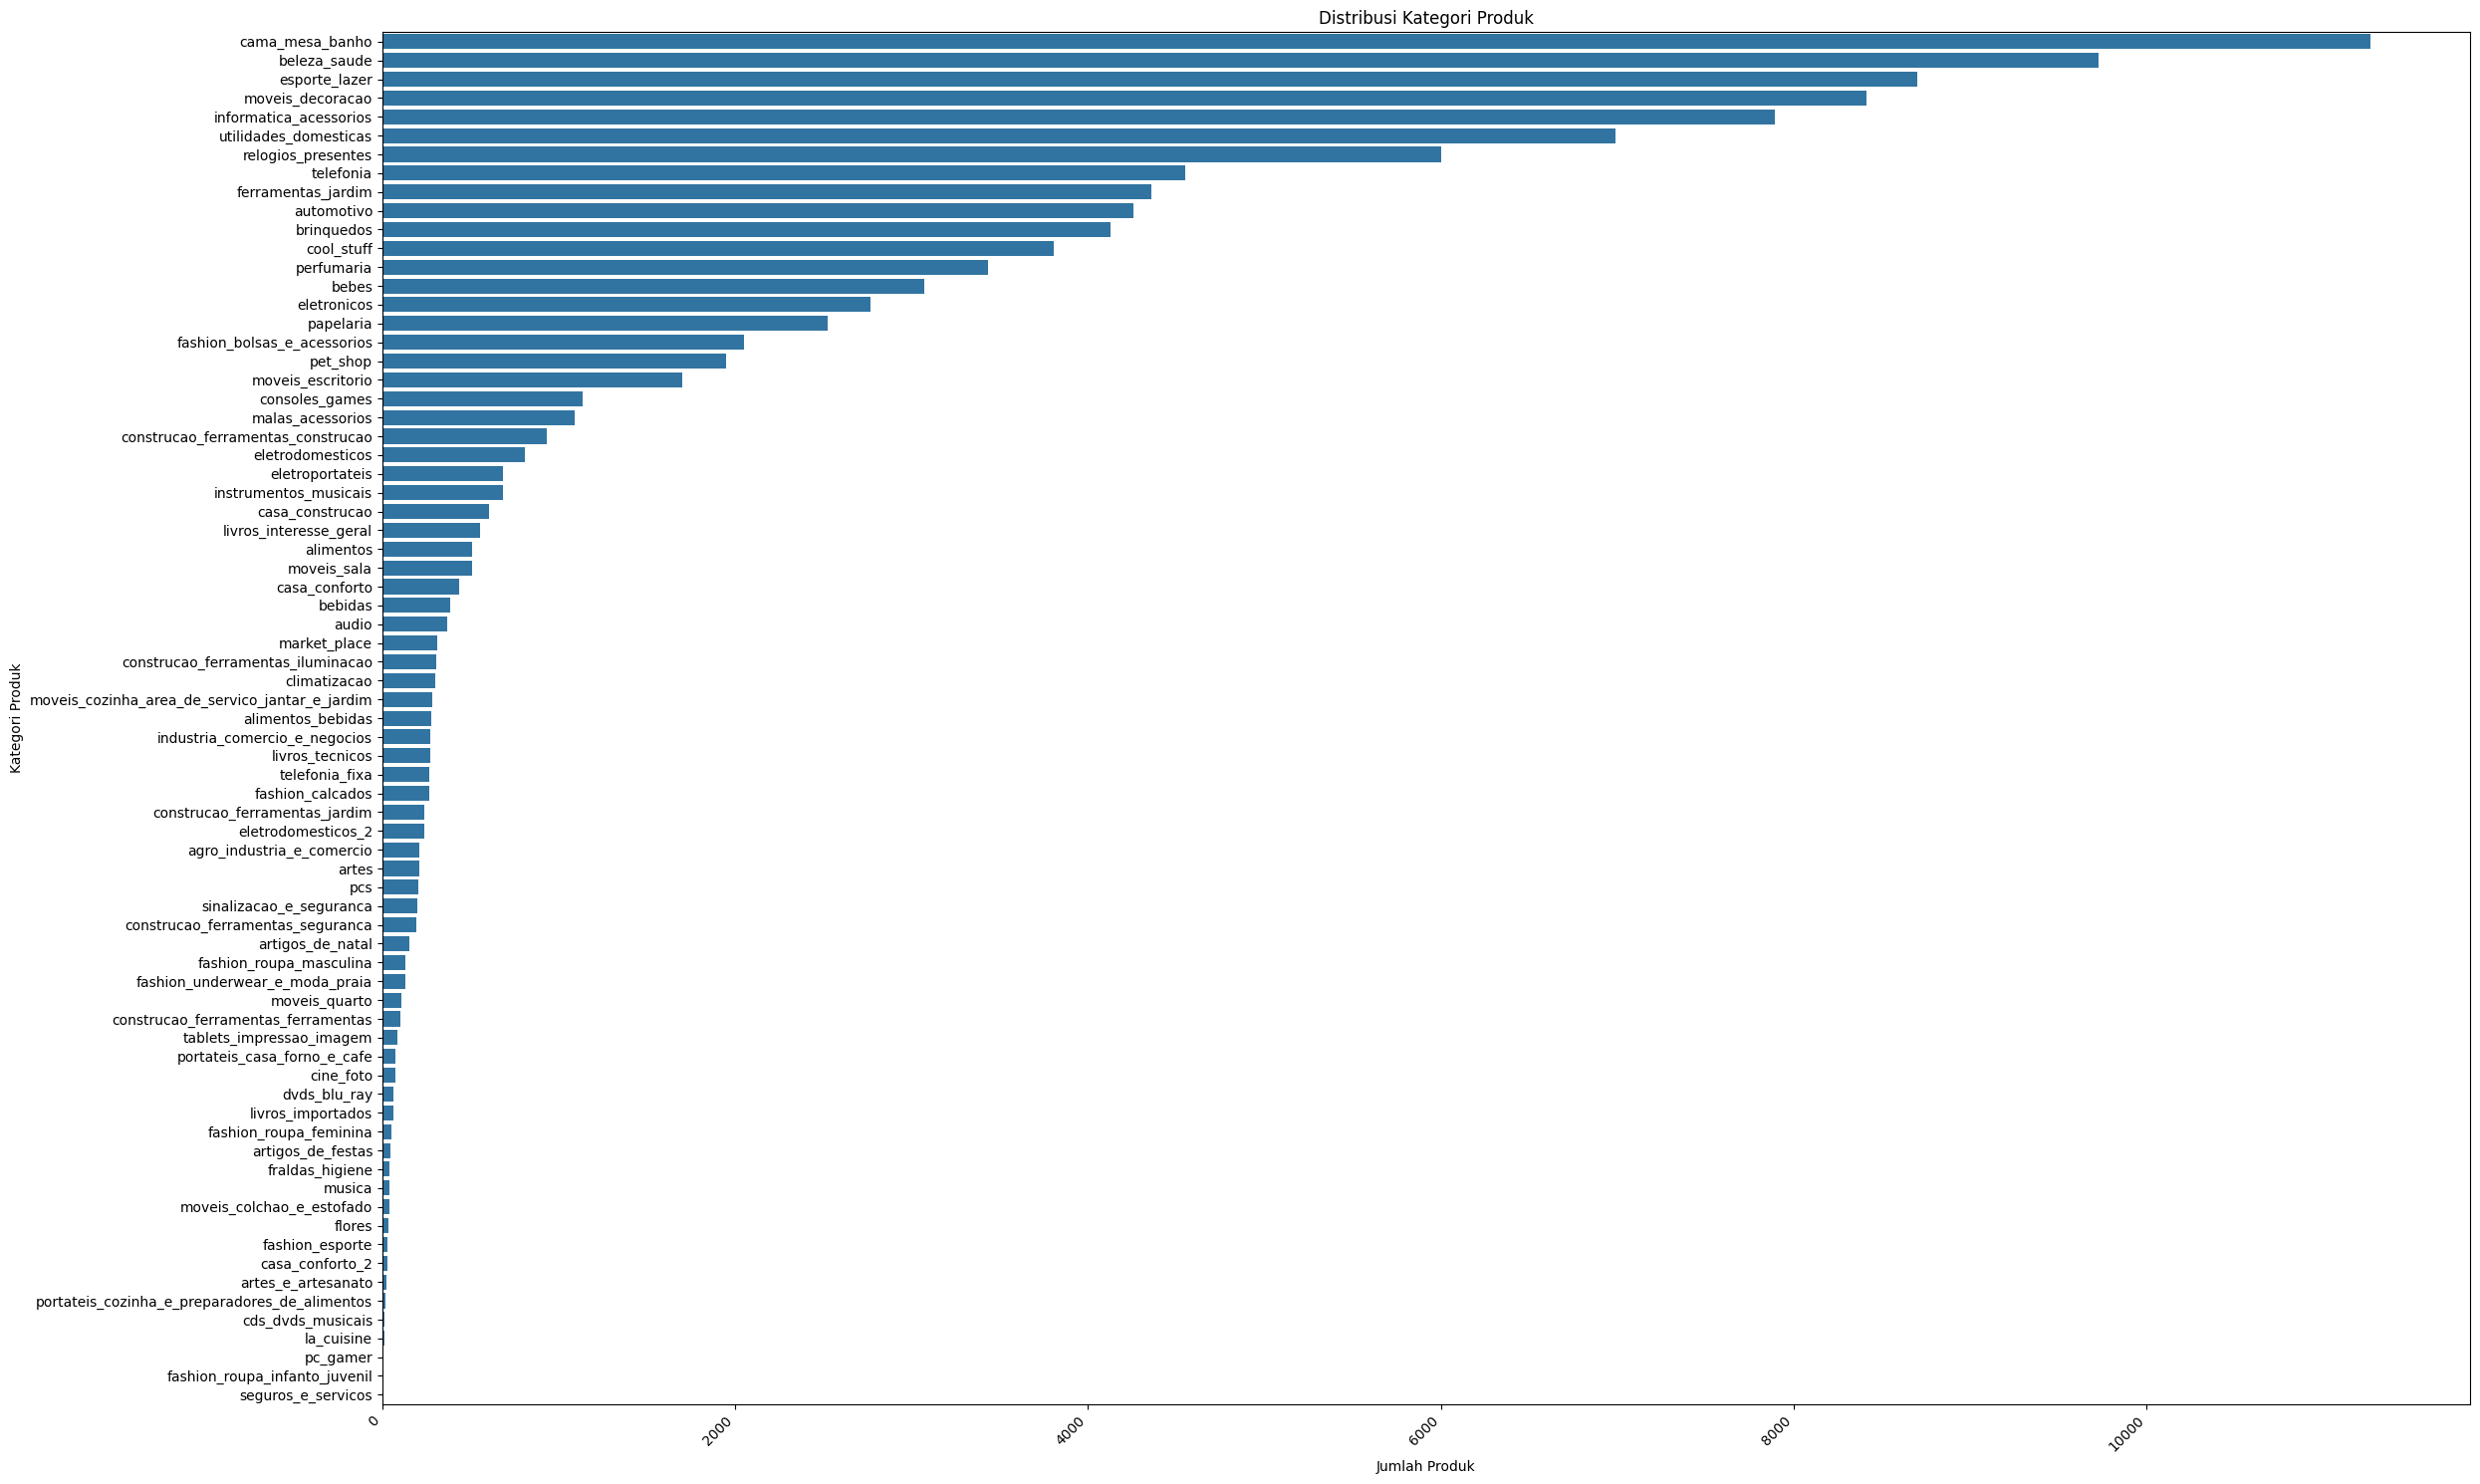

In [33]:
# Visualisasi Distribusi Kategori Produk
plt.figure(figsize=(25, 15))  # Memperbesar ukuran plot menjadi lebih besar
sns.countplot(y='product_category_name', data=df_final, order=df_final['product_category_name'].value_counts().index)
plt.title('Distribusi Kategori Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')

# Atur rotasi dan jarak antar label
plt.xticks(rotation=45, ha='right')  # ha='right' memastikan label sejajar ke kanan agar tidak terlalu berdekatan

# Atur padding dan jarak antar label
plt.gca().margins(x=0.05)  # Memberi margin lebih di sumbu x agar lebih longgar
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()


**Insight:** Untuk melihat kategori produk yang paling sering muncul dalam dataset. Kategori dengan frekuensi tinggi, seperti health_beauty, perfumery, dan computers_accessories, menunjukkan produk yang paling sering dijual.

**2. Distribusi Lokasi Geografis Konsumen**

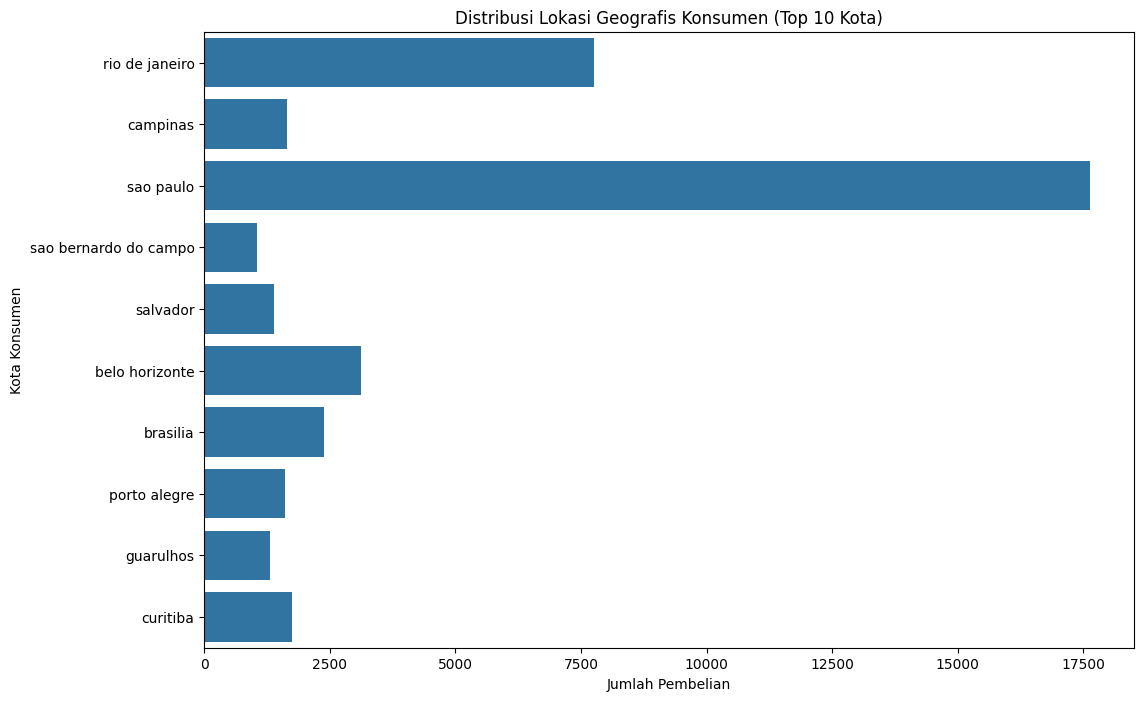

In [34]:
plt.figure(figsize=(12, 8))
top_cities = df_final['customer_city'].value_counts().nlargest(10).index
sns.countplot(y='customer_city', data=df_final[df_final['customer_city'].isin(top_cities)])
plt.title('Distribusi Lokasi Geografis Konsumen (Top 10 Kota)')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kota Konsumen')
plt.show()


**Insight:** Distribusi ini akan menunjukkan kota-kota dengan jumlah pembelian terbanyak. Misalnya, São Paulo, Rio de Janeiro, dan Belo Horizonte biasanya menjadi pusat aktivitas e-commerce.


**3. Distribusi Harga Produk**

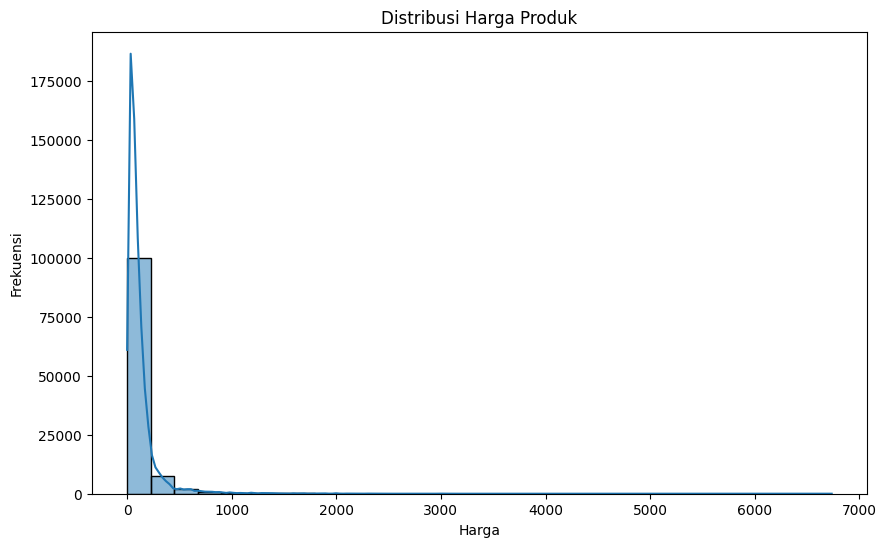

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['price'], bins=30, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


**Insight:** Distribusi harga produk akan membantu kita memahami apakah sebagian besar produk berada dalam rentang harga tertentu, misalnya produk dengan harga rendah lebih sering dibeli.


**4. Distribusi Jumlah Pembelian Produk per Pesanan**

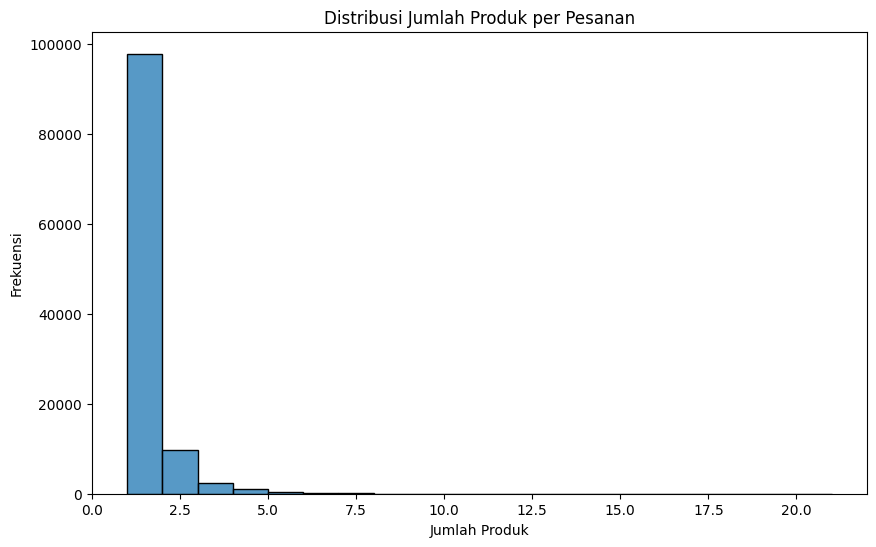

In [36]:

plt.figure(figsize=(10, 6))
sns.histplot(df_final['order_item_id'], bins=20, kde=False)
plt.title('Distribusi Jumlah Produk per Pesanan')
plt.xlabel('Jumlah Produk')
plt.ylabel('Frekuensi')
plt.show()

**Insight:** Analisis ini menunjukkan rata-rata jumlah produk yang dipesan oleh konsumen dalam satu pesanan.

**5. Distribusi Skor Ulasan Konsumen**

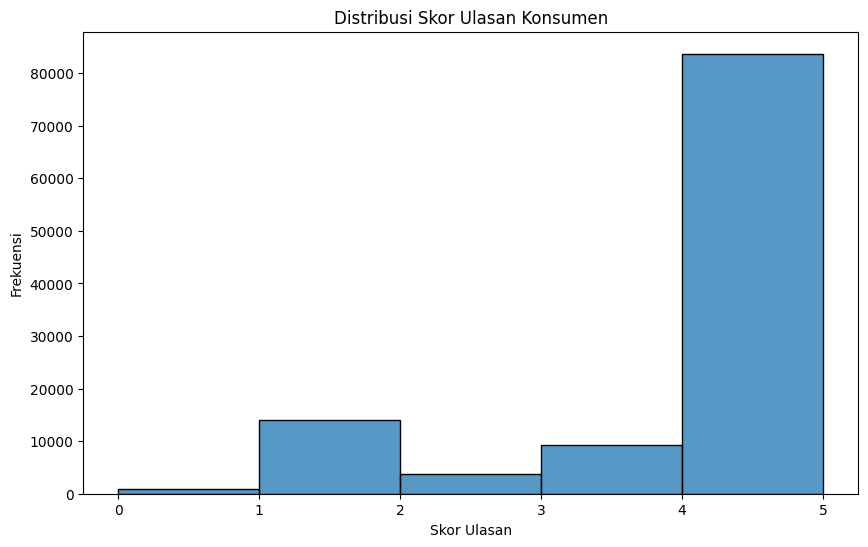

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['review_score'], bins=5, kde=False)
plt.title('Distribusi Skor Ulasan Konsumen')
plt.xlabel('Skor Ulasan')
plt.ylabel('Frekuensi')
plt.show()

**Insight:** Distribusi skor ulasan memberikan informasi tentang bagaimana konsumen menilai produk yang mereka beli. Skor ulasan yang lebih tinggi menunjukkan kepuasan pelanggan yang lebih besar, sementara distribusi ulasan yang rendah dapat menjadi indikasi masalah kualitas produk atau layanan.

**6. Distribusi Waktu Pengiriman**

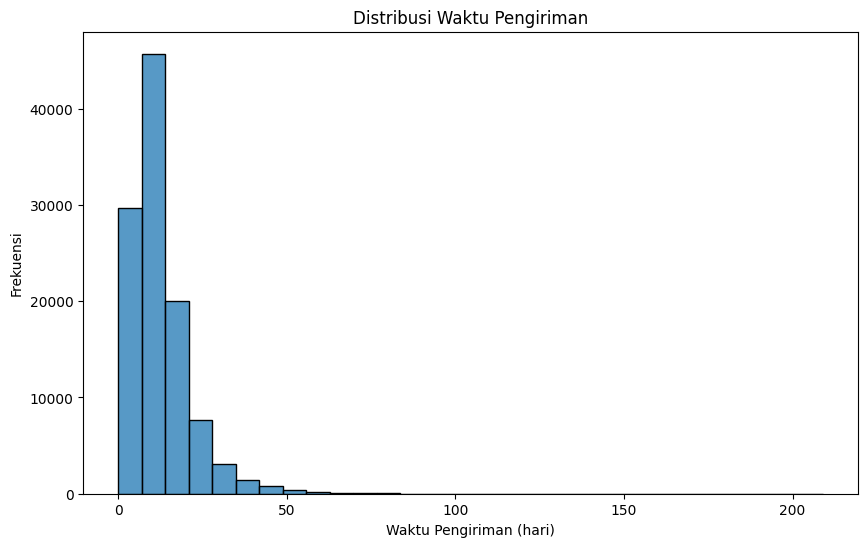

In [38]:
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'])

df_final['shipping_time'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df_final['shipping_time'], bins=30, kde=False)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:** Sebagian besar pesanan dikirimkan dalam waktu kurang dari seminggu, namun ada juga pesanan yang memerlukan waktu lebih lama untuk sampai ke pelanggan. Hal ini dapat menunjukkan potensi masalah logistik di area tertentu.

**7. Distribusi Metode Pembayaran**

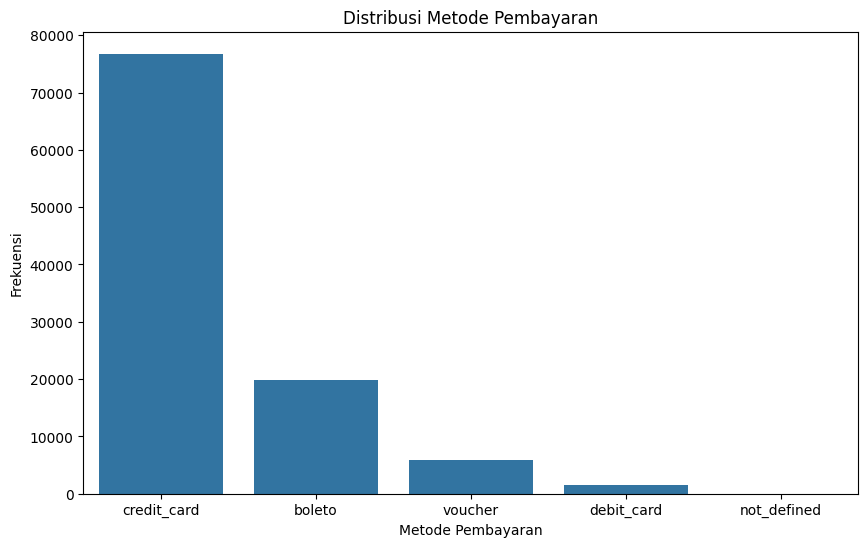

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=df_payments)
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Frekuensi')
plt.show()


**Insight:** Dapat embantu kita memahami metode pembayaran yang paling banyak digunakan oleh pelanggan, seperti credit_card, boleto, voucher, atau debit_card.

**8. Distribusi Jumlah Pembayaran per Pesanan**


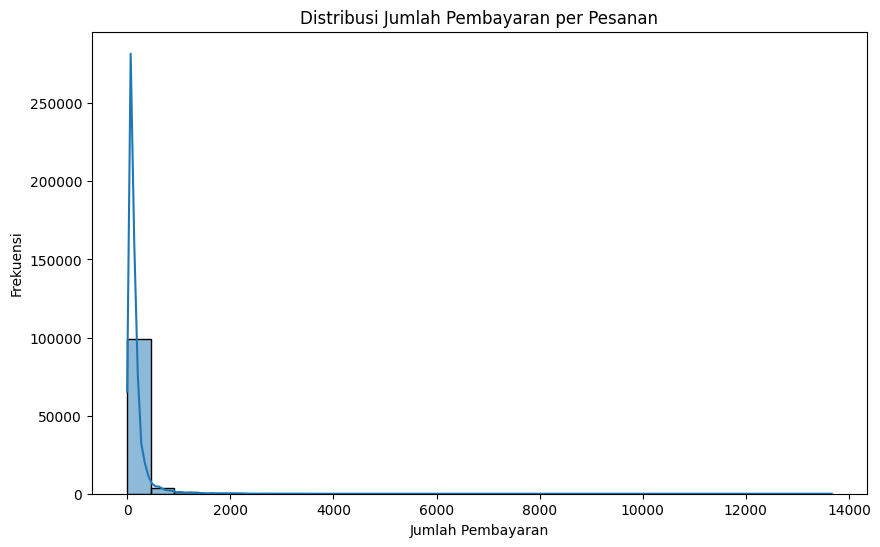

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_payments['payment_value'], bins=30, kde=True)
plt.title('Distribusi Jumlah Pembayaran per Pesanan')
plt.xlabel('Jumlah Pembayaran')
plt.ylabel('Frekuensi')
plt.show()


**Insight:** Analisis ini akan menunjukkan rentang pembayaran yang paling umum dalam dataset, dapat membantu memahami kecenderungan belanja pelanggan dan potensi segmen harga yang paling diminati.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pola pembelian dipengaruhi oleh kategori produk dan lokasi geografis?

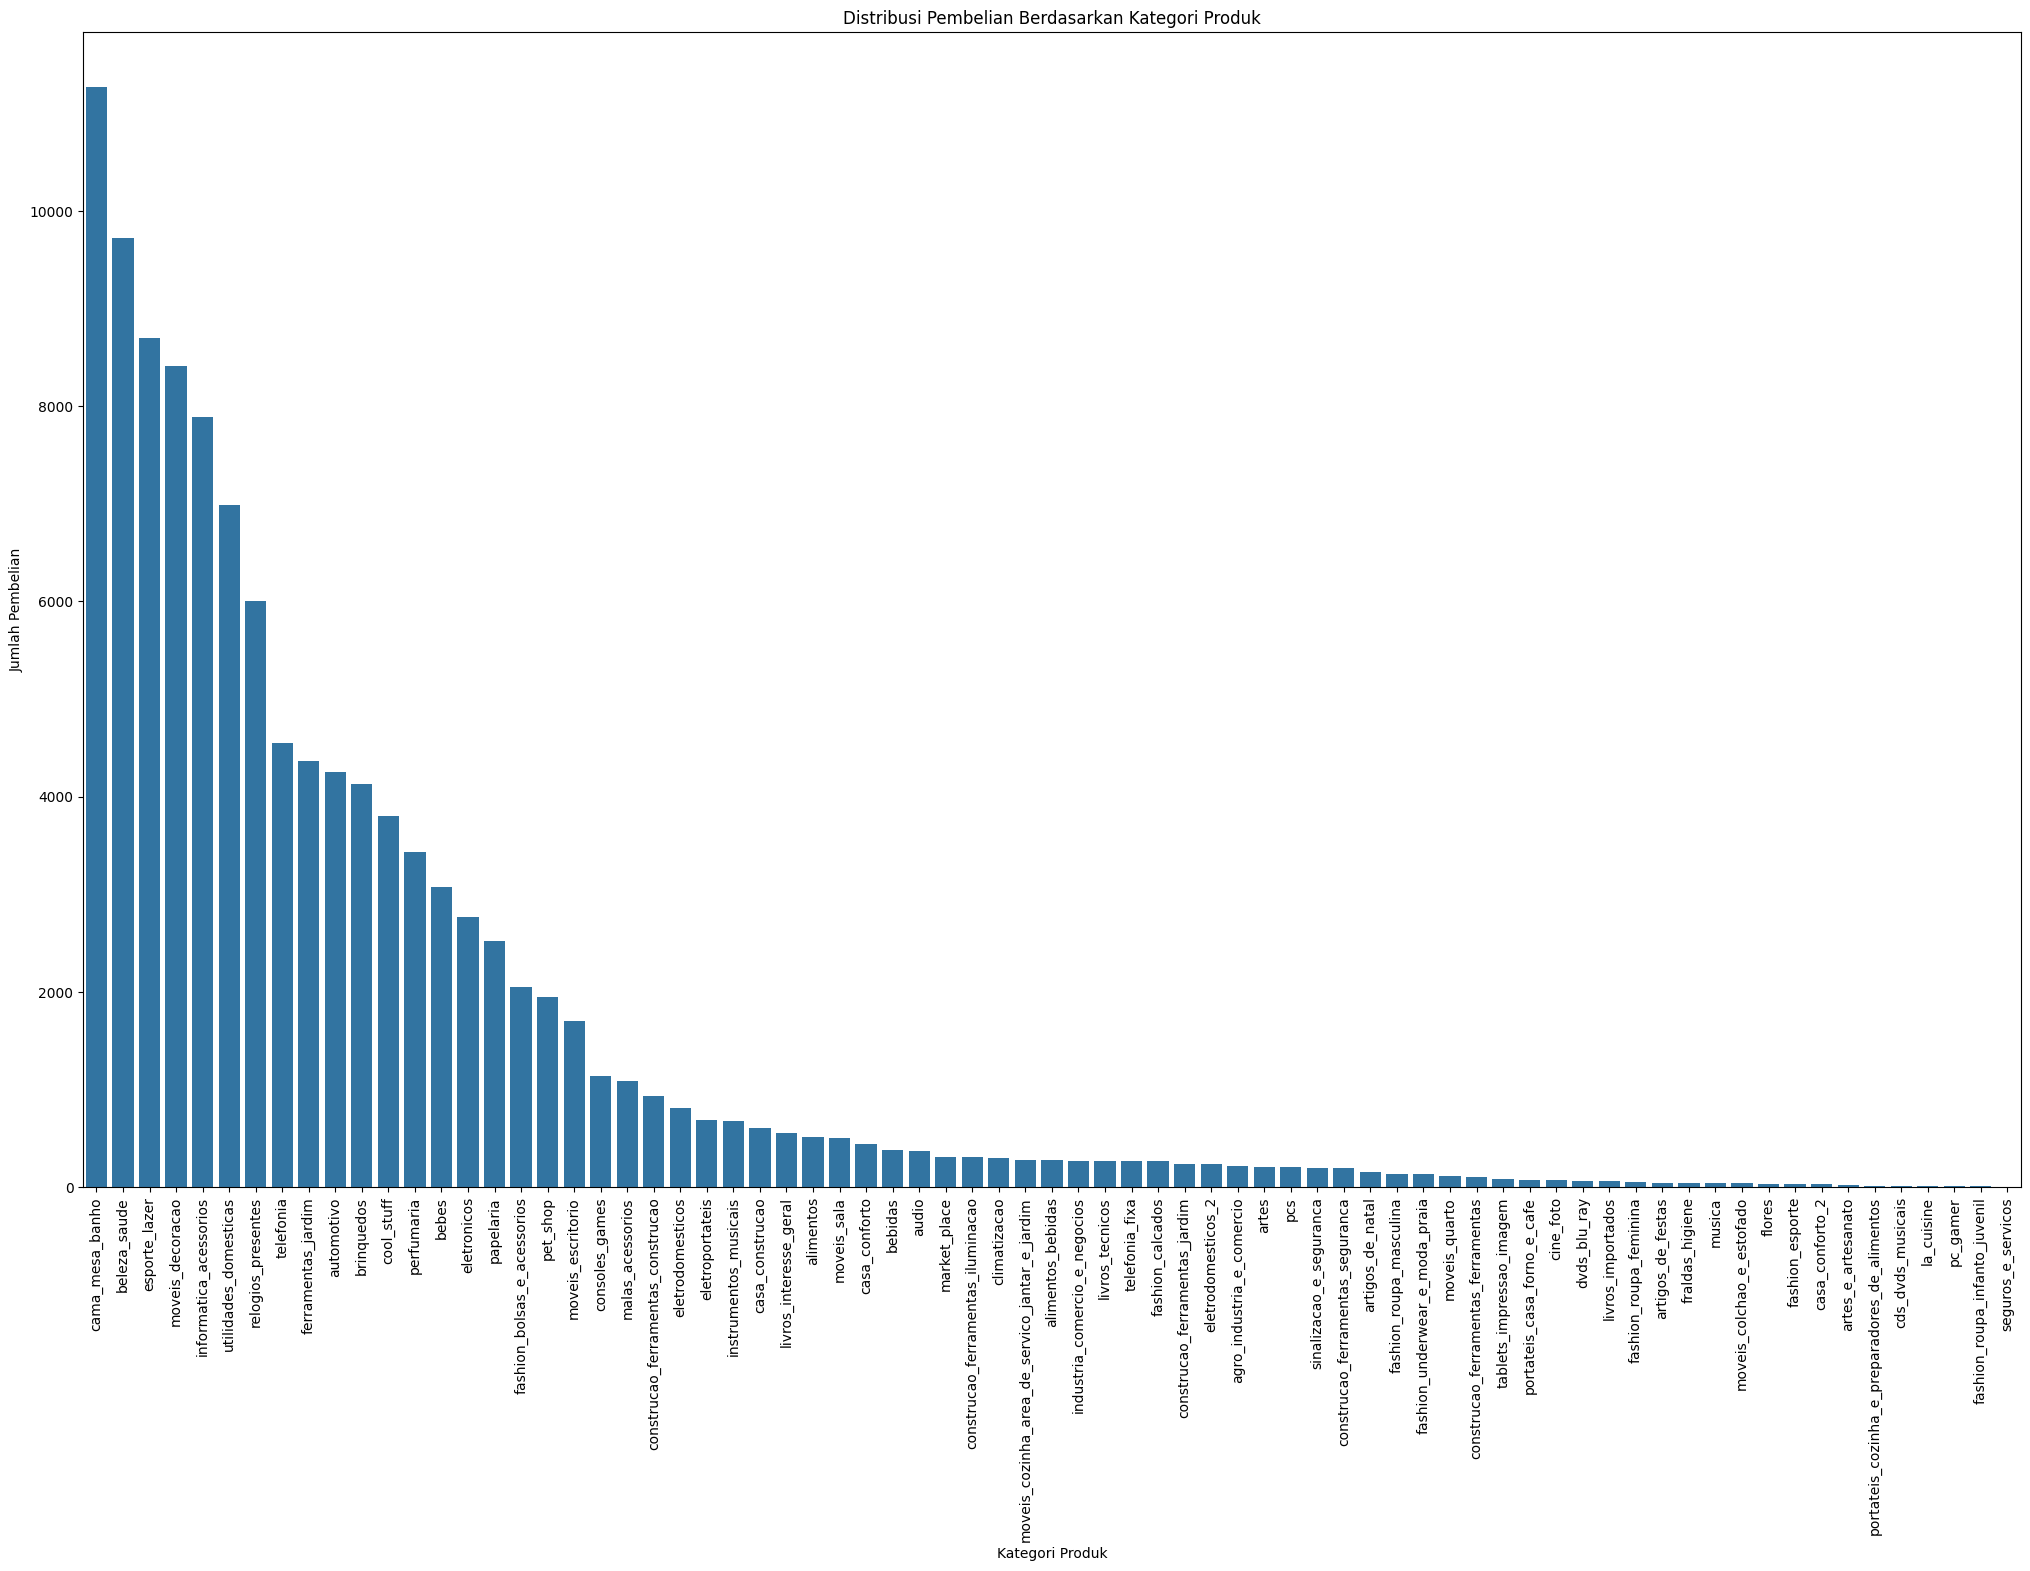

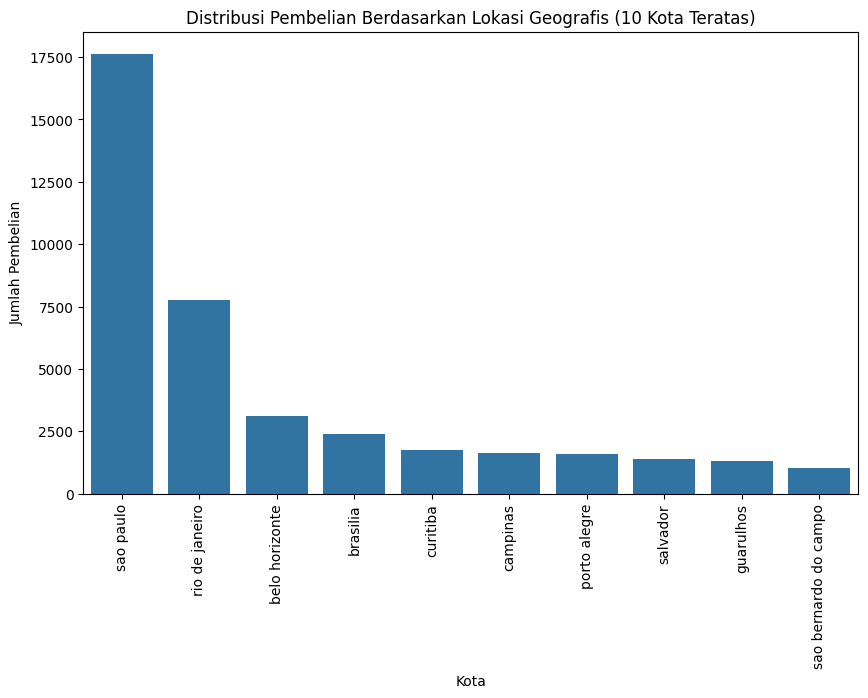

In [41]:
# Visualisasi distribusi pembelian berdasarkan kategori produk
plt.figure(figsize=(25, 15))
sns.countplot(data=df_final, x='product_category_name', order=df_final['product_category_name'].value_counts().index)
plt.title('Distribusi Pembelian Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=90)
plt.show()

# Visualisasi distribusi pembelian berdasarkan lokasi geografis (kota)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='customer_city', order=df_final['customer_city'].value_counts().head(10).index)
plt.title('Distribusi Pembelian Berdasarkan Lokasi Geografis (10 Kota Teratas)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=90)
plt.show()


**Insight:** Data menampilkan sebagian besar konsumen berasal dari Kota Sao Paulo, kemudian Rio de Janeiro. Ini menunjukkan wilayah perkotaan mendominasi pembelian

### Pertanyaan 2:

Bagaimana ulasan konsumen berkaitan dengan produk yang paling banyak dibeli?


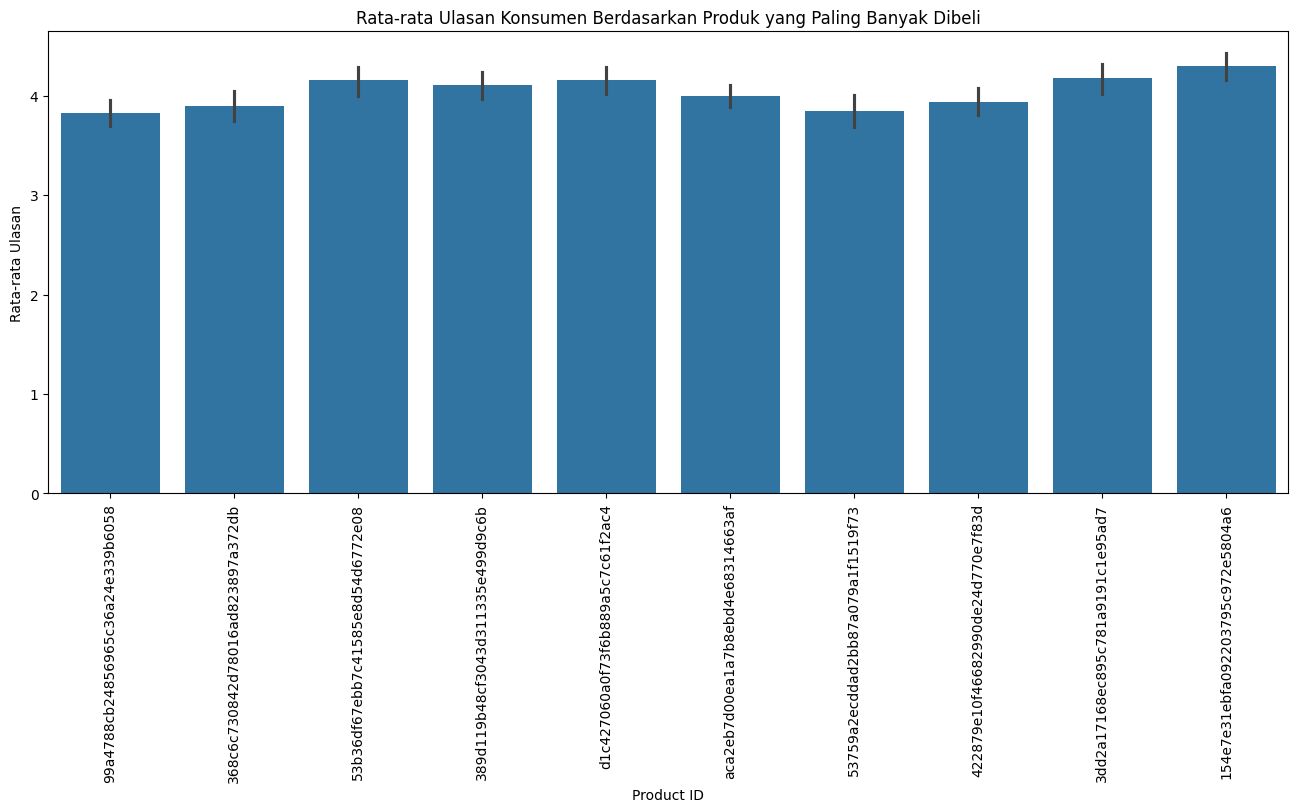

In [42]:
# Ambil 10 produk yang paling banyak dibeli
top_products = df_final['product_id'].value_counts().head(10).index

# Filter data untuk produk yang paling banyak dibeli
df_top_products = df_final[df_final['product_id'].isin(top_products)]

# Visualisasi rata-rata ulasan untuk produk yang paling banyak dibeli
plt.figure(figsize=(16, 6))
sns.barplot(data=df_top_products, x='product_id', y='review_score', estimator=np.mean)
plt.title('Rata-rata Ulasan Konsumen Berdasarkan Produk yang Paling Banyak Dibeli')
plt.xlabel('Product ID')
plt.ylabel('Rata-rata Ulasan')
plt.xticks(rotation=90)
plt.show()



**Insight:**
Produk yang paling banyak dibeli umumnya mendapatkan ulasan yang lebih baik.

## Analisis Lanjutan

Time Series Analysis

<ipython-input-43-9acb9b05faf6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_orders.resample('M').size()


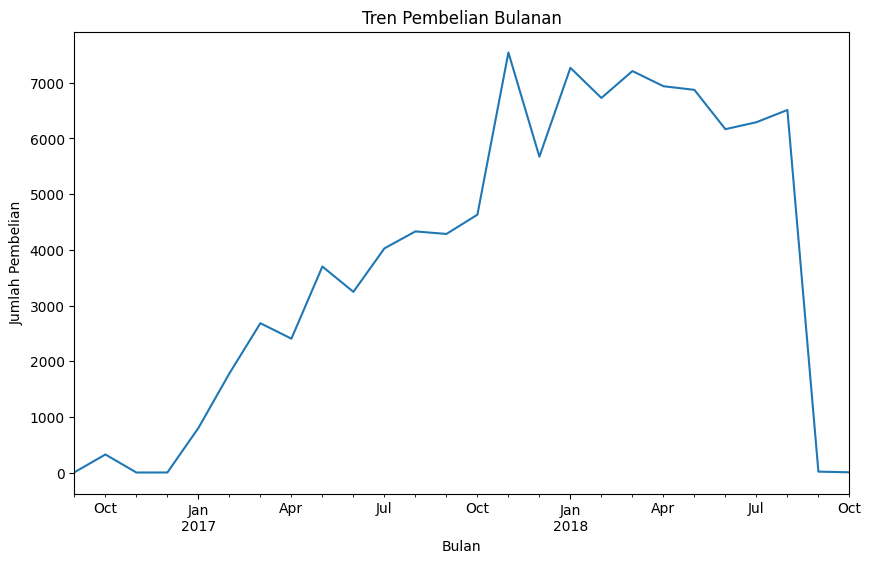

In [43]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders.set_index('order_purchase_timestamp', inplace=True)

# Resample data untuk melihat tren pembelian bulanan
monthly_sales = df_orders.resample('M').size()

# Visualisasi
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Tren Pembelian Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.show()


**Insight:** Fluktuasi penjualan di awal atau pertengahan tahun bisa diatasi dengan merancang promosi yang lebih agresif pada bulan-bulan dengan penjualan rendah.

## Conclusion

- Conclution pertanyaan 1 :
Pembelian produk sangat dipengaruhi oleh kategori dan lokasi pembelian, dengan perbedaan pola distribusi di berbagai wilayah.

- Conclution pertanyaan 2 : Produk yang paling banyak dibeli cenderung memiliki ulasan konsumen yang lebih baik, menunjukkan adanya keterkaitan antara popularitas dan kualitas produk.

- Conclution analisis lanjutan : Dengan memahami pola musiman, bisnis dapat mengalokasikan sumber daya secara efisien, baik dari sisi pemasaran maupun operasional.